In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
data = pd.read_csv('coupons.csv')
data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [114]:
data.info()
data.describe()
data.isnull().sum()
#Understanding what data I am working with

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,5474.000000,5474.000000,5474.0,5474.000000,5474.000000,5474.000000,5474.000000,5474.0
mean,61.955608,0.439898,1.0,0.607965,0.157654,0.207892,0.792108,0.0
std,19.327919,0.496420,0.0,0.488249,0.364450,0.405836,0.405836,0.0
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.0
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.0
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.0
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.0


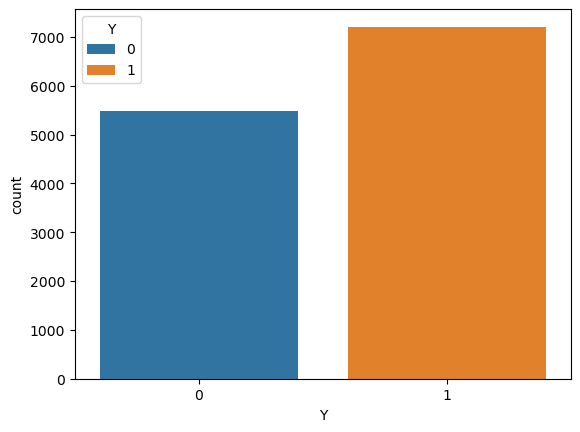

In [128]:
accepted = data[data['Y'] == 1]
rejected = data[data['Y'] == 0]
#I want to know whether people accepted or rejected more coupons at the end of all the trials
sns.countplot(x='Y', hue='Y', data=data)
accepted.describe()
rejected.describe()

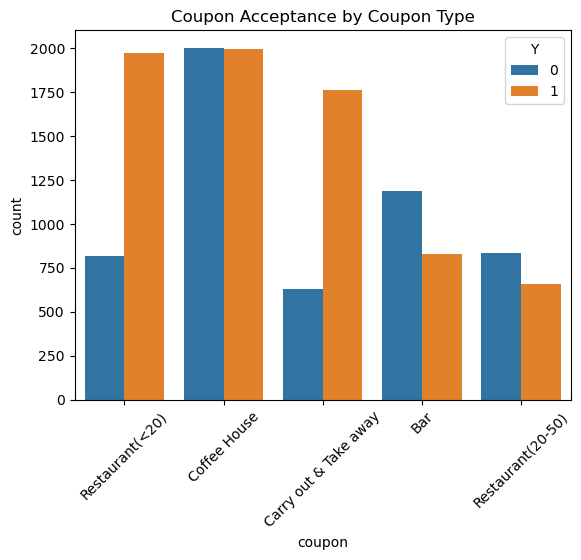

In [171]:
sns.countplot(x='coupon', hue='Y', data=data)
plt.xticks(rotation = 45)
plt.title('Coupon Acceptance by Coupon Type')
plt.show()
#Now which category did people accept the coupons more

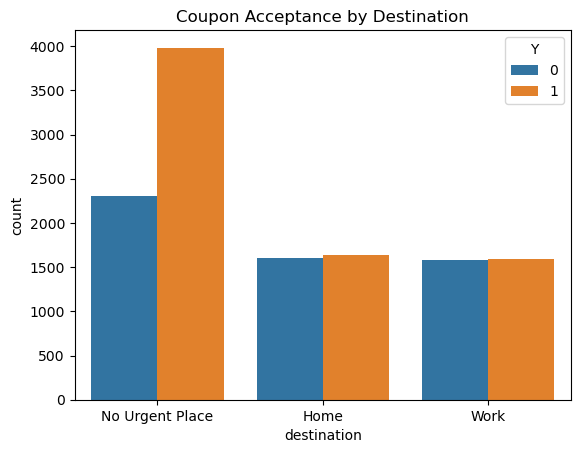

In [169]:
sns.countplot(x='destination', hue='Y', data=data)
plt.title('Coupon Acceptance by Destination')
plt.show()
#Whether if the destination affected if people accepted the coupons

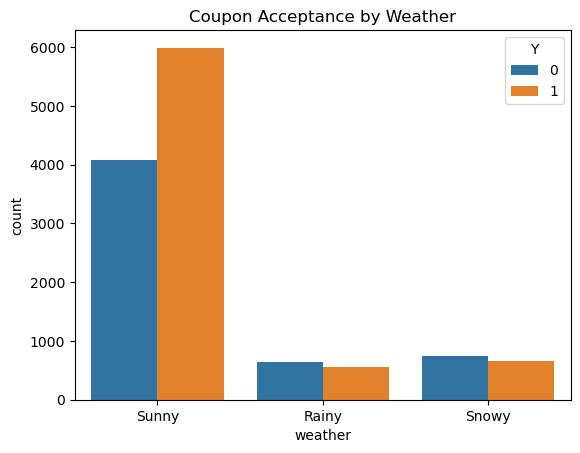

In [167]:
sns.countplot(x='weather', hue='Y', data=data)
plt.title('Coupon Acceptance by Weather')
plt.show()
#Whether if the wheather affected if people accepted the coupons

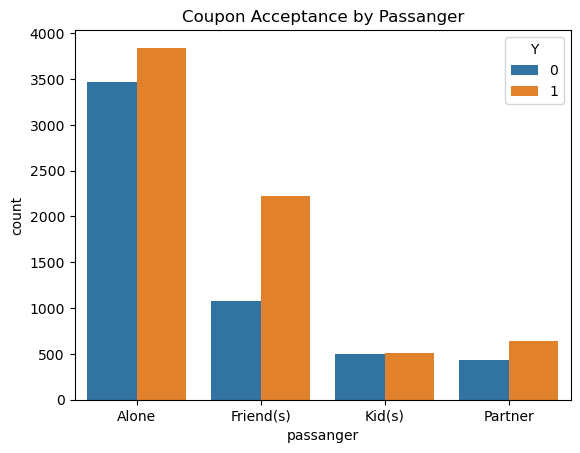

In [165]:
sns.countplot(x='passanger', hue='Y', data=data)
plt.title('Coupon Acceptance by Passanger')
plt.show()
#Whether the passangers affected if people accepted the coupons

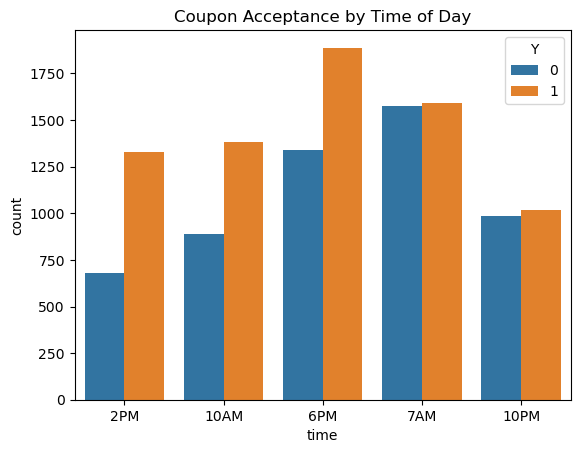

In [163]:
sns.countplot(x='time', hue='Y', data=data)
plt.title('Coupon Acceptance by Time of Day')
plt.show()
#Whether the Time of day affected if people accepted the coupons

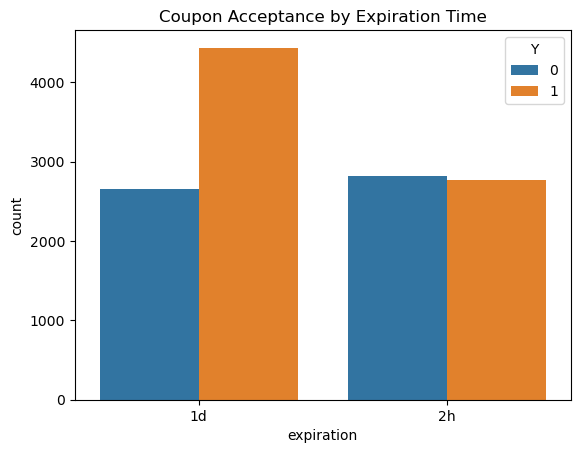

In [161]:
sns.countplot(x='expiration', hue='Y', data=data)
plt.title('Coupon Acceptance by Expiration Time')
plt.show()
#Whether the expiration of the coupons affected if people accepted the coupons

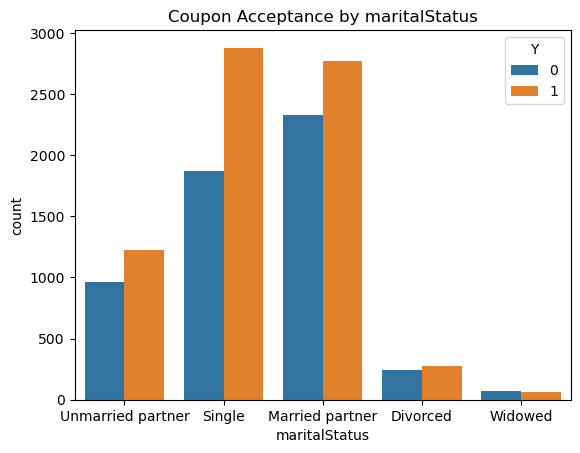

In [159]:
sns.countplot(x='maritalStatus', hue='Y', data=data)
plt.title('Coupon Acceptance by maritalStatus')
plt.show()
#Whether the marital status affected if people accepted the coupons